<a href="https://colab.research.google.com/github/ItsmeKumar/DS5500/blob/master/uNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/zhixuhao/unet

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.91 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [0]:
import os
os.chdir('/content/unet')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from model import *
from data import *

Using TensorFlow backend.


In [0]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=10,epochs=5,callbacks=[model_checkpoint])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)





Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.





10/10 [==============================] - 20s 2s/step - loss: 0.7022 - acc: 0.6445

Epoch 00001: loss improved from inf to 0.70221, saving model to unet_membrane.hdf5
Epoch 2/5
10/10 [==============================] - 4s 447ms/step - loss: 0.6928 - acc: 0.7861

Epoch 00002: loss improved from 0.70221 to 0.69276, saving model to unet_membrane.hdf5
Epoch 3/5
10/10 [==============================] - 4s 437ms/step - loss: 0.6925 - acc: 0.7771

Epoch 00003: loss improved from 0.69276 to 0.69248, saving model to unet_membrane.hdf5
Epoch 4/5
10/10 [==============================] - 4s 435ms/step - loss: 0.6922 - acc: 0.7816

Epoch 00004: loss improved from 0.69248 to 0.69219, saving model to unet_membrane.hdf5
Epoch 5/5
10/10 [==============================] - 4s 440ms/step - loss: 0.6919 - acc: 0.7755

Epoch 00005: loss improved from 0.69219 to 0.69194, saving model to unet_membrane.hdf5


In [0]:
import pickle
os.makedirs('/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/model/',exist_ok=True)
pickle.dump(model, open('/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/model/unet_model', 'wb'))

In [0]:
import pickle
loaded_model = pickle.load(open('/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/model/unet_model', 'rb'))

In [0]:
testGene = testGenerator("/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/processed/satellite_950",949)
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,950,verbose=1)
saveResult("/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/processed/satellite_950",results)

/content/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:709: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


949/950 [============================>.] - ETA: 0s

StopIteration: ignored

In [0]:
# path = '/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/processed/satellite_50/'
# i = 0
# for filename in os.listdir(path):
#     os.rename(os.path.join(path,filename), os.path.join(path+str(i)+'.png'))
#     i = i +1

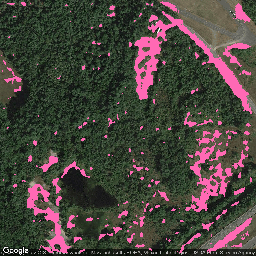

In [0]:

from PIL import Image
back = Image.open("/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/raw/satellite_50/954.jpg")
back = back.resize((256,256), Image.ANTIALIAS)
back = back.convert("RGBA")
back


import numpy as np
from PIL import ImageOps
fore = Image.open("/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/processed/satellite_50/4_predict.png")
fore = np.array(fore)
fore = (fore  < 120).astype(int)

fore = ImageOps.invert(Image.fromarray(np.uint8(fore)*255))
fore = fore.convert("RGBA")
datas = fore.getdata()
newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255,0))
    else:
        newData.append((255,105,180,255))    

fore.putdata(newData)
fore  = fore.convert("RGBA")

fore

back.paste(fore, (0, 0), fore)
back

In [0]:
back.close()

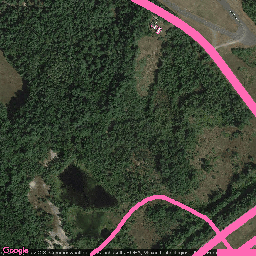

In [0]:
from PIL import Image
back = Image.open("/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/raw/satellite_50/954.jpg")
back = back.resize((256,256), Image.ANTIALIAS)
back = back.convert("RGBA")
back

from PIL import Image
fore2 = Image.open("/content/drive/My Drive/DS 5500/Data/PSdata/Google_Images/raw/mask_50/954.jpg")
fore2 = fore2.resize((256,256), Image.ANTIALIAS)
fore2 = ImageOps.invert(Image.fromarray(np.uint8(fore2)*255))
fore2 = fore2.convert("RGBA")
datas = fore2.getdata()
newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255,0))
    else:
        newData.append((255,105,180,255))    

fore2.putdata(newData)
fore2  = fore2.convert("RGBA")
fore2


back.paste(fore2, (0, 0), fore2)
back